In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime
import re
from collections import Counter

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
with open('kym.json', 'r', encoding='utf-8') as reader:
    memes = json.load(reader)

#### Total number of meme entries in the raw data file

In [4]:
len(memes)

28799

#### Example of meme entry</font>

In [5]:
print(json.dumps(memes[0], indent=4))

{
    "title": "This is Relevant To My Interests",
    "url": "https://knowyourmeme.com/memes/this-is-relevant-to-my-interests",
    "last_update_source": 1547002898,
    "category": "Meme",
    "template_image_url": "https://i.kym-cdn.com/entries/icons/original/000/000/021/relevant-to-my-interests.jpg",
    "meta": {
        "og:title": "This is Relevant To My Interests",
        "og:site_name": "Know Your Meme",
        "og:image": "https://i.kym-cdn.com/entries/icons/facebook/000/000/021/relevant-to-my-interests.jpg",
        "og:image:width": "600",
        "og:image:height": "315",
        "og:type": "article",
        "fb:app_id": "104675392961482",
        "fb:pages": "88519108736",
        "article:publisher": "https://www.facebook.com/knowyourmeme",
        "twitter:card": "summary_large_image",
        "twitter:site": "@knowyourmeme",
        "twitter:creator": "@knowyourmeme",
        "twitter:title": "This is Relevant To My Interests",
        "twitter:description": "\"This

#### Total number of distinct meme entries (by title)

In [6]:
unique_titles = set([meme['title'] for meme in memes])
print(len(unique_titles))

16713


**Around 58% meme entries are unique**. Same goes for URLs.

### Meme categories

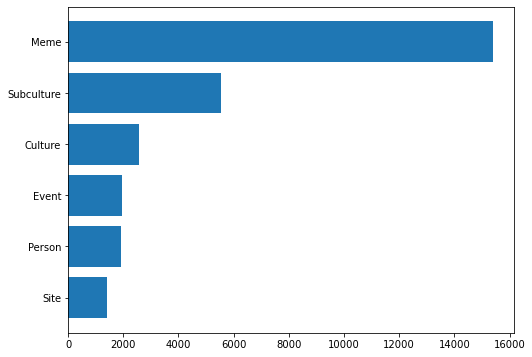

In [7]:
categories = [meme['category'] for meme in memes]
categories_counter = {}
for cat in categories:
    if cat not in categories_counter:
        categories_counter[cat] = 0
        
    categories_counter[cat] += 1
    
categories_counter = dict(sorted(categories_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(categories_counter.keys())), categories_counter.values(), tick_label=list(categories_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

### Details Attribute Breakdown

#### Status

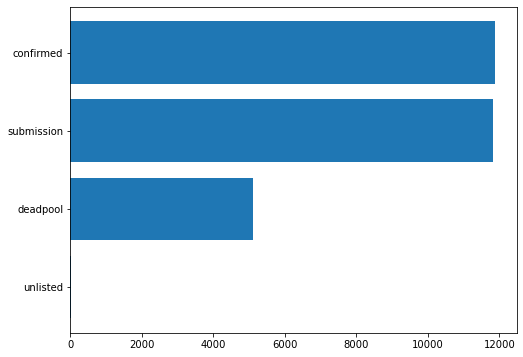

In [8]:
status = [meme['details']['status'] for meme in memes]
status_counter = {}
for st in status:
    if st not in status_counter:
        status_counter[st] = 0
        
    status_counter[st] += 1
    
status_counter = dict(sorted(status_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(status_counter.keys())), status_counter.values(), tick_label=list(status_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

Status refers to the submission status of a meme to KYM site by a registered member.

* **confirmed**: the submission is reviewed and approved
* **submission**: the submission is currenly beeing researched and evaluated
* **deadpool**: the submission has been rejected due to incompliteness or lack of notability
* **unlisted**: didn't find any description; 5/6 entries refer to the same [meme page](https://knowyourmeme.com/memes/spurdo-sparde) (marked as sensitive)

**Suggestion**: *keep only meme entries having confirmed status*

#### Origin

In [9]:
origin = [meme['details']['origin'] for meme in memes]
origin_counter = Counter()
for orig in origin:
    origin_counter[orig] += 1
    
print('Total number of origin sources:', len(origin_counter))
print('\nTop 10 most frequent origin sources:')
for orig, cnt in origin_counter.most_common(10):
    print(f'{orig:<15}: {cnt:>4}')

Total number of origin sources: 6667

Top 10 most frequent origin sources:
Unknown        : 4141
YouTube        : 1774
4chan          : 1382
Twitter        :  895
ARPANET        :  556
Tumblr         :  554
Reddit         :  478
Facebook       :  457
France         :  358
United States  :  338


#### Type

The full list of types and categories available [here](https://knowyourmeme.com/categories)

In [10]:
from wordcloud import WordCloud


types = []
for meme in memes:
    try:
        t = meme['details']['type']
        if len(t) > 1:
            for tt in t:
                types.append(tt.split('/')[-1])
        else:
            types.append(t[0].split('/')[-1])
    except KeyError:
        pass

type_counter = Counter()
for t in types:
    type_counter[t] += 1
    
print('Total number of types:', len(type_counter))
print('\nTop 10 most frequent types:')
for t, cnt in type_counter.most_common(10):
    print(f'{t:<15}: {cnt:>4}')
    
    
text = ' '.join(t for t in types)
wordcloud = WordCloud(max_words=len(types), background_color="white").generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
t_len = []
for meme in memes:
    try:
        t = meme['details']['type']
        t_len.append(len(t))
    except KeyError:
        pass
    
    
tlen_counter = {}
for tl in t_len:
    if tl not in tlen_counter:
        tlen_counter[tl] = 0
        
    tlen_counter[tl] += 1
    
tlen_counter = dict(sorted(tlen_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(tlen_counter.keys())), tlen_counter.values(), tick_label=list(tlen_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

Meme entries come from 111 various types. Most of the entries feature only one type, but others might have up to 9 types.

There are quite a few types implying *sensitive content* of the meme entry like
* crime
* disaster
* exploitable
* fetish
* religion

**Suggestion**: *filter out meme entries of types listed above.*

In [ ]:
sensitive_types = ('crime', 'disaster', 'exploitable', 'fetish', 'religion')

for t in sensitive_types:
    print(f'{t:<15}: {type_counter[t]:>4}')

#### Year

In [ ]:
year = [meme['details']['year'] for meme in memes]
year_counter = Counter()
for y in year:
    try:
        year_counter[int(y)] += 1
    except:
        year_counter[y] += 1
    
print('Total number of year values:', len(year_counter)-1)
print('\nTop 10 most frequent year values:')
for y, cnt in year_counter.most_common(10):
    if y:
        print(f'{y:<5}: {cnt:>4}')

In [ ]:
print('The latest emerged meme:', np.max([y for y in year_counter.keys() if y]))

In [ ]:
print('The earliest emerged meme:', np.min([y for y in year_counter.keys() if y]))

* **3,177 meme entries lack year information**
* some memes are coming ahead of time (one goes as far as 2916)
* other memes dates back to medieval times (as early as 11th century)
* in fact, the concept of Internet meme was introduced back in 1993 (look [here](https://en.wikipedia.org/wiki/Internet_meme#:~:text=Internet%20memes%20grew%20as%20a%20concept%20in%20the%20mid-1990s.%20At%20the%20time%2C%20memes%20were%20just%20short%20clips%20that%20were%20shared%20between%20people%20in%20Usenet%20forums.%5Bcitation%20needed%5D))

**Suggestion**: *fix time frame for all meme entries between 1993 to 2021; those going outside should be removed*

In [ ]:
unrealistic = 0
for y in year_counter:
    if y and (y > 2021 or y < 1993):
        unrealistic += year_counter[y]
        
print(f'Total number of meme entries outside of 1993-2021 range: {unrealistic - 3177}')

### Added

Timestamp of first submission to KYM site

In [ ]:
added_dt = []
for meme in memes:
    try:
        added_dt.append(datetime.fromtimestamp(meme['added']))
    except KeyError:
        pass
    
added_year = [dt_obj.year for dt_obj in added_dt]
print('Total number of submission year values:', len(np.unique(added_year)))

print('The earliest submitted meme:', np.min(added_year))
print('The latest submitted meme:', np.max(added_year))

### Tags

In [ ]:
tags = []

for meme in memes:
    try:
        tags += meme['tags']
    except KeyError:
        pass
    
    
tag_counter = Counter()
for t in tags:
    tag_counter[t] += 1
    
    
print('Total number of tags:', len(tag_counter))
print('\nTop 10 most frequent tags:')
for t, cnt in tag_counter.most_common(10):
    print(f'{t:<15}: {cnt:>4}')
    
    
text = ' '.join(t for t in tags)
wordcloud = WordCloud(max_words=len(tags), background_color="white").generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

The tag attribute is such a mess (some tags make no sense at all); requires loads of pre-processing and some smart clustering.

In [ ]:
tags_len = []

for meme in memes:
    try:
        tags_len.append(len(meme['tags']))
    except KeyError:
        pass
    
plt.figure(figsize=(8, 6))    
plt.hist(tags_len, bins=int(np.sqrt(len(tags_len))))
plt.xlabel('# tags', fontsize=14)
plt.ylabel('counts', fontsize=14);

Number of tags assigned to meme entries has pretty big variance (from no tags up to 50 tags); the vast majority of meme entries feature 4 tags.

### Search Keywords

In [ ]:
skws = []
for meme in memes:
    try:
        skws += meme['search_keywords']
    except KeyError:
        pass
    
    
skw_counter = Counter()
for kw in skws:
    skw_counter[kw] += 1
    
print('Total number of search keywords:', len(skw_counter))
print('\nTop 10 most frequent search keywords:')
for kw, cnt in skw_counter.most_common(10):
    print(f'{kw:<20}: {cnt:>4}')
    
text = ' '.join(kw for kw in skws)
wordcloud = WordCloud(max_words=len(skws), background_color="white").generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
skw_len = []

for meme in memes:
    try:
        skw_len.append(len(meme['search_keywords']))
    except KeyError:
        pass
    
print('Min # search kws:', min(skw_len))
print('Max # search kws:', max(skw_len))

skwlen_counter = {}
for skw in skw_len:
    if skw not in skwlen_counter:
        skwlen_counter[skw] = 0
        
    skwlen_counter[skw] += 1
    
skwlen_counter = dict(sorted(skwlen_counter.items(), key=lambda item: item[1], reverse=True))
  
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(np.arange(len(skwlen_counter.keys())), skwlen_counter.values(), tick_label=list(skwlen_counter.keys()));
#ax.bar_label(bars, padding=3.)
ax.invert_yaxis();

Most of the meme entries have only one search keyword which is usually the same one as the meme's title. Some of the entries might have up to 6 search keywords.

## Prepare data for future analysis

In [4]:
cleaned_memes = []

for meme in memes:
    meme_dict = {}
    if meme['category'] != 'Meme':
        continue
        
    if meme['details']['status'] != 'confirmed':
        continue
        
    if meme['details'].get('type', None):
        if set(map(lambda link: link.split('/')[-1], meme['details']['type']))\
        & {'crime', 'disaster', 'exploitable', 'fetish', 'religion'}:
            continue
        
    if meme['title'] in list(map(lambda entry: entry['title'], cleaned_memes)):
        cleaned_meme = list(filter(lambda entry: entry['title'] == meme['title'], cleaned_memes))[-1]
        if datetime.fromtimestamp(meme['last_update_source']) > datetime.fromisoformat(cleaned_meme['last_update_in_kym']):
            cleaned_memes.remove(cleaned_meme)
        elif datetime.fromtimestamp(meme['last_update_source']) == datetime.fromisoformat(cleaned_meme['last_update_in_kym']):
            continue
        else:
            continue
        
    meme_dict['title'] = meme['title']
    meme_dict['kym_url'] = meme['url']
    meme_dict['last_update_in_kym'] = datetime.fromtimestamp(meme['last_update_source']).strftime('%Y-%m-%d %H:%M:%S')
    meme_dict['img_url'] = meme['template_image_url']
    meme_dict['description'] = meme['meta']['description']
    meme_dict['source'] = 'Know Your Meme'
    meme_dict['added_to_kym'] = datetime.fromtimestamp(meme['added']).strftime('%Y-%m-%d')\
                                if meme.get('added', None) else None
    
    meme_dict['origin'] = meme['details']['origin']
    
    if meme['details'].get('year', None):
        if 1993 <= int(meme['details']['year']) < 2022:
            meme_dict['year'] = int(meme['details']['year'])
        else:
            meme_dict['year'] = None
    else:
        meme_dict['year'] = None
    
    meme_dict['type'] = ",".join(list(map(lambda link: link.split('/')[-1], meme['details']['type'])))\
                        if meme['details'].get('type', None) else None
    try:
        meme_dict['about'] = " ".join(meme['content']['about']['text'])
    except KeyError:
        meme_dict['about'] = None
        
    try:
        spread_references = re.findall(r'\[\d+\]', "".join(meme['content']['spread']['text']))
        meme_dict['spread_counts'] = len(spread_references) # count number of external references appeared in spread description
        
        # find all occurences of dates, year specifically, mentioned in spread description
        spread_years = re.findall(r'(199\d|20[0-1]\d|202[0-1])', "".join(meme['content']['spread']['text']))
        if spread_years:
            meme_dict['spread_year_min'] = min(list(map(int, spread_years)))
            meme_dict['spread_year_max'] = max(list(map(int, spread_years)))
            
            most_freq_year = Counter(list(map(int, spread_years))).most_common(1)[0]
            meme_dict['spread_year_most_frequent'] = most_freq_year[0] if most_freq_year[1] > 1 else None
        else:
            meme_dict['spread_year_min'] = None
            meme_dict['spread_year_max'] = None
            meme_dict['spread_year_most_frequent'] = None
            
        # build a dictionary of external references
        # key - reference number in brackets, value - reference name
        exrefs_dict = {} 
        for entry in meme['content']['external references']['text']:
            try:
                num, name = entry.split('] ')
                exrefs_dict[num + ']'] = name.split(' \u2013 ')[0].strip()
            except ValueError: # not enough values to unpack
                continue
            
        # put together all reference names mentioned in the spread section in a list
        spread_names = []
        for ref in spread_references:
            spread_names.append(exrefs_dict[ref])
            
        meme_dict['spread_references'] = ",".join(set(spread_names))
    except KeyError:
        meme_dict['spread_counts'] = 0
        meme_dict['spread_references'] = None
        
    #meme_dict[''] = meme[]
    #meme_dict[''] = meme[]
    #meme_dict[''] = meme[]
    #meme_dict[''] = meme[]
    meme_dict['tags'] = ",".join(meme['tags']) if meme.get('tags', None) else None
    meme_dict['search_keywords'] = ",".join(meme['search_keywords']) if meme.get('search_keywords', None) else None
    meme_dict['parent'] = meme.get('parent', None)
    meme_dict['siblings'] = ",".join(meme['siblings']) if meme.get('siblings', None) else None
    meme_dict['children'] = ",".join(meme['children']) if meme.get('children', None) else None
    
    cleaned_memes.append(meme_dict)

In [5]:
pd.DataFrame(cleaned_memes)

,title,kym_url,last_update_in_kym,img_url,description,source,added_to_kym,origin,year,type,...,spread_counts,spread_year_min,spread_year_max,spread_year_most_frequent,spread_references,tags,search_keywords,parent,siblings,children
0,This is Relevant To My Interests,https://knowyourmeme.com/memes/this-is-relevan...,2019-01-09 05:01:38,https://i.kym-cdn.com/entries/icons/original/0...,"""This is relevant to my interests"" is a popula...",Know Your Meme,2008-12-12,I Can Has Cheezburger,2006.0,None,...,9,2006.0,2012.0,2006.0,"Facebook,I Can Has Cheezburger,Urban Dictionar...","image macros,comment,comments,approval,image m...","\""This is relevant to my interests\""",None,None,None
1,ROFLcopter,https://knowyourmeme.com/memes/roflcopter,2020-06-06 02:38:57,https://i.kym-cdn.com/entries/icons/original/0...,An ASCII helicopter becomes an Internet meme. ...,Know Your Meme,2008-12-12,Warcraft III,2004.0,slang,...,4,2004.0,2012.0,NaN,"ROFL.name,FunnyJunk,Reddit,Daily Motion","ascii,animated gif,rofl,acronym,initialism",roflcopter,https://knowyourmeme.com/memes/lol-ascii,"https://knowyourmeme.com/memes/lollerskates,ht...",None
2,Leave Britney Alone,https://knowyourmeme.com/memes/leave-britney-a...,2021-02-12 13:28:59,https://i.kym-cdn.com/entries/icons/original/0...,“Leave Britney Alone” is a viral video in whic...,Know Your Meme,2008-12-12,YouTube,2007.0,None,...,0,2007.0,2007.0,NaN,,"youtube,rant,britney spears,response,freakout,...","\""leave britney alone\"",\""chris crocker\""",https://knowyourmeme.com/memes/people/chris-cr...,https://knowyourmeme.com/memes/leave-britney-a...,None
3,O RLY?,https://knowyourmeme.com/memes/o-rly,2021-03-13 15:58:19,https://i.kym-cdn.com/entries/icons/original/0...,"O RLY is internet slang for ""OH REALLY?"" with ...",Know Your Meme,2008-12-12,Something Awful,2003.0,None,...,1,2004.0,2005.0,NaN,archive.tinychan,"image macro,owl,orly,o rly,negative,somethinga...","\""o rly\""",https://knowyourmeme.com/memes/lolspeak-chanspeak,"https://knowyourmeme.com/memes/normie,https://...",None
4,Yatta!,https://knowyourmeme.com/memes/yatta,2018-07-18 00:07:48,https://i.kym-cdn.com/entries/icons/original/0...,“Yatta!” is a 2001 parody song by a fictional ...,Know Your Meme,2009-02-18,Happa-Tai,2001.0,None,...,0,2001.0,2001.0,NaN,None,"japan,yatta,happa-tai",Yatta,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,Roof Koreans,https://knowyourmeme.com/memes/roof-koreans,2021-04-19 01:47:35,https://i.kym-cdn.com/entries/icons/original/0...,"Roof Koreans, also known as Rooftop Koreans, i...",Know Your Meme,2016-09-30,L.A. Riots,NaN,slang,...,5,2012.0,2015.0,NaN,"Urban Dictionary,Reddit,Wayback Machine","la riots,guns,rifles,armbritain,madmaxtrac,fau...","\""roof koreans\""",None,None,None
3098,Vagina Bones,https://knowyourmeme.com/memes/vagina-bones,2020-11-11 01:25:43,https://i.kym-cdn.com/entries/icons/original/0...,Vagina Bones is an internet slang term that re...,Know Your Meme,2016-05-18,Urban Dictionary,2006.0,slang,...,3,2011.0,2015.0,NaN,"Japanator,Cheat Engine,Baby Center","pelvis,female,anime,manga,video games,dream ea...","\""vagina bones\""",https://knowyourmeme.com/memes/internet-slang,"https://knowyourmeme.com/memes/fax-no-printer,...",None
3099,Liberal Douche Garofalo,https://knowyourmeme.com/memes/liberal-douche-...,2021-04-04 13:22:41,https://i.kym-cdn.com/entries/icons/original/0...,Liberal Douche Garofalo is an advice animal im...,Know Your Meme,2012-03-28,4chan,2009.0,None,...,8,2009.0,2012.0,2009.0,"Facebook,Quickmeme,Urban Dictionary,Tumblr,Nyy...","advice dog,hypocrite,liberal,janeane garofalo",Liberal Douche Garofalo,https://knowyourmeme.com/memes/advice-animals,https://knowyourmeme.com/memes/angry-advice-ma...,None
3100,Polybius,https://knowyourmeme.com/memes/polybius,2021-03-29 23:54:44,https://i.kym-cdn.com/entries/icons/original/0...,Polybius is a fictional arcade game that was s...,Know Your Meme,2011-08-26,Poly-Play,NaN,conspiracy-theo

In [13]:
pd.DataFrame(cleaned_memes).isnull().sum()

title                           0
kym_url                         0
last_update_in_kym              0
img_url                         0
description                     0
source                          0
added_to_kym                    2
origin                          0
year                          245
type                         1959
about                          56
spread_counts                   0
spread_year_min               688
spread_year_max               688
spread_year_most_frequent    1905
spread_references             571
tags                           14
search_keywords               440
parent                        734
siblings                      734
children                     2677
dtype: int64

In [14]:
(pd.DataFrame(cleaned_memes)['title'].value_counts() > 1).sum()

0

In [6]:
kym2 = pd.DataFrame(cleaned_memes)

In [21]:
kym2.shape

(3102, 20)

In [17]:
kym_vision2 = pd.read_parquet('kym_vision_processed.parquet', engine='pyarrow')

In [19]:
kym_vision2.shape

(16686, 4)

In [8]:
kym2 = kym2.rename(columns = {"kym_url": "url"})

In [10]:
kym_spot2 = pd.read_parquet('kym_spotlight_processed.parquet', engine='pyarrow')
kym_spot2

,@text,types_DBpedia,types_Schema,url,doc2vec
0,"""This is Relevant To My Interests"" is an expre...",None,None,https://knowyourmeme.com/memes/this-is-relevan...,"[0.08686423, -0.070542954, -0.014521181, -0.02..."
1,ROFLcopter is an Internet slang term used as a...,None,None,https://knowyourmeme.com/memes/roflcopter,"[0.008695466, -0.062786505, 0.008734312, 0.010..."
2,Bitches Don't Know is an exploitable image mac...,"[Software, Work]",[CreativeWork],https://knowyourmeme.com/memes/bitches-dont-know,"[0.046772316, -0.009891867, -0.059313163, 0.07..."
3,"""Leave Britney Alone"" is a viral video in whic...","[Person, MusicalWork, Song, TopicalConcept, Mu...","[WebSite, CreativeWork, Person, MusicRecording]",https://knowyourmeme.com/memes/leave-britney-a...,"[0.080392644, 0.071670175, -0.029083513, -0.03..."
4,O RLY is internet slang for “OH REALLY?” with ...,None,None,https://knowyourmeme.com/memes/o-rly,"[0.09286018, 0.027148524, 0.08155558, -0.09250..."
...,...,...,...,...,...
7598,Knuckles is a character from the Sonic the Hed...,"[Agent, FictionalCharacter]",None,https://knowyourmeme.com/memes/knuckles--2,"[0.005579239, 0.07470587, -0.040527888, 0.0354..."
7599,"The Bogeyman (also spelled as bogieman, boogey...","[Agent, FictionalCharacter]",None,https://knowyourmeme.com/memes/the-bogeyman,"[-0.09703078, 0.03946965, 0.065784745, -0.0621..."
7600,Calvin and Hobbes Log Bridge Parodies are a se...,"[Agent, Person]",[Person],https://knowyourmeme.com/memes/calvin-and-hobb...,"[0.011745669, 0.06296249, 0.060303953, -0.0603..."
7601,Vagina Bones is an internet slang term that re...,"[Location, City, PopulatedPlace, Place, Anatom...","[City, Place, Language]",https://knowyourmeme.com/memes/vagina-bones,"[0.030961445, 0.05241178, 0.044786215, -0.0872..."


In [11]:
final = kym2.merge(kym_vision2, on = "url", how = "left")

In [12]:
final2 = final.merge(kym_spot2, on = "url", how = "left")

In [13]:
final2.shape

(3102, 28)

In [16]:
pd.set_option("display.max_columns", None)
final.head()

,title,url,last_update_in_kym,img_url,description,source,added_to_kym,origin,year,type,about,spread_counts,spread_year_min,spread_year_max,spread_year_most_frequent,spread_references,tags,search_keywords,parent,siblings,children,labelAnnotations,webDetection,error
0,This is Relevant To My Interests,https://knowyourmeme.com/memes/this-is-relevan...,2019-01-09 05:01:38,https://i.kym-cdn.com/entries/icons/original/0...,"""This is relevant to my interests"" is a popula...",Know Your Meme,2008-12-12,I Can Has Cheezburger,2006.0,None,"""This is Relevant To My Interests"" is an expre...",9,2006.0,2012.0,2006.0,"Facebook,I Can Has Cheezburger,Urban Dictionar...","image macros,comment,comments,approval,image m...","\""This is relevant to my interests\""",None,None,None,"[{'description': 'Cat', 'mid': '/m/01yrx', 'sc...",{'bestGuessLabels': [{'label': 'interest meme'...,None
1,ROFLcopter,https://knowyourmeme.com/memes/roflcopter,2020-06-06 02:38:57,https://i.kym-cdn.com/entries/icons/original/0...,An ASCII helicopter becomes an Internet meme. ...,Know Your Meme,2008-12-12,Warcraft III,2004.0,slang,ROFLcopter is an Internet slang term used as a...,4,2004.0,2012.0,NaN,"ROFL.name,FunnyJunk,Reddit,Daily Motion","ascii,animated gif,rofl,acronym,initialism",roflcopter,https://knowyourmeme.com/memes/lol-ascii,"https://knowyourmeme.com/memes/lollerskates,ht...",None,"[{'description': 'Font', 'mid': '/m/03gq5hm', ...",{'bestGuessLabels': [{'label': 'my roflcopter ...,None
2,Leave Britney Alone,https://knowyourmeme.com/memes/leave-britney-a...,2021-02-12 13:28:59,https://i.kym-cdn.com/entries/icons/original/0...,“Leave Britney Alone” is a viral video in whic...,Know Your Meme,2008-12-12,YouTube,2007.0,None,"""Leave Britney Alone"" is a viral video in whic...",0,2007.0,2007.0,NaN,,"youtube,rant,britney spears,response,freakout,...","\""leave britney alone\"",\""chris crocker\""",https://knowyourmeme.com/memes/people/chris-cr...,https://knowyourmeme.com/memes/leave-britney-a...,None,"[{'description': 'Face', 'mid': '/m/0dzct', 's...",{'bestGuessLabels': [{'label': 'leave britney ...,None
3,O RLY?,https://knowyourmeme.com/memes/o-rly,2021-03-13 15:58:19,https://i.kym-cdn.com/entries/icons/original/0...,"O RLY is internet slang for ""OH REALLY?"" with ...",Know Your Meme,2008-12-12,Something Awful,2003.0,None,O RLY is internet slang for “OH REALLY?” with ...,1,2004.0,2005.0,NaN,archive.tinychan,"image macro,owl,orly,o rly,negative,somethinga...","\""o rly\""",https://knowyourmeme.com/memes/lolspeak-chanspeak,"https://knowyourmeme.com/memes/normie,https://...",None,"[{'description': 'Head', 'mid': '/m/04hgtk', '...","{'bestGuessLabels': [{'label': 'o rly', 'langu...",None
4,Yatta!,https://knowyourmeme.com/memes/yatta,2018-07-18 00:07:48,https://i.kym-cdn.com/entries/icons/original/0...,“Yatta!” is a 2001 parody song by a fictional ...,Know Your Meme,2009-02-18,Happa-Tai,2001.0,None,"""Yatta!"" is a 2001 parody song by a fictional ...",0,2001.0,2001.0,NaN,None,"japan,yatta,happa-tai",Yatta,None,None,None,"[{'description': 'Water', 'mid': '/m/0838f', '...","{'bestGuessLabels': [{'label': 'yata japan', '...",None


In [27]:
final.to_parquet("kym+vision.parquet")

In [24]:
final = final[~final["labelAnnotations"].isnull()]

In [25]:
pd.set_option("display.max_columns", None)
final.head()

,title,url,last_update_in_kym,img_url,description,source,added_to_kym,origin,year,type,about,spread_counts,spread_year_min,spread_year_max,spread_year_most_frequent,spread_references,tags,search_keywords,parent,siblings,children,error,labelAnnotations,safeSearch_adult,safeSearch_medical,safeSearch_racy,safeSearch_spoof,safeSearch_violence,webDetection
0,This is Relevant To My Interests,https://knowyourmeme.com/memes/this-is-relevan...,2019-01-09 05:01:38,https://i.kym-cdn.com/entries/icons/original/0...,"""This is relevant to my interests"" is a popula...",Know Your Meme,2008-12-12,I Can Has Cheezburger,2006.0,None,"""This is Relevant To My Interests"" is an expre...",9,2006.0,2012.0,2006.0,"Tumblr,Flickr,Urban Dictionary,Zazzle,Memebase...","image macros,comment,comments,approval,image m...","\""This is relevant to my interests\""",None,None,None,None,"[{'description': 'Cat', 'mid': '/m/01yrx', 'sc...",0.00,0.00,0.00,1.00,0.25,{'bestGuessLabels': [{'label': 'interest meme'...
1,ROFLcopter,https://knowyourmeme.com/memes/roflcopter,2020-06-06 02:38:57,https://i.kym-cdn.com/entries/icons/original/0...,An ASCII helicopter becomes an Internet meme. ...,Know Your Meme,2008-12-12,Warcraft III,2004.0,slang,ROFLcopter is an Internet slang term used as a...,4,2004.0,2012.0,NaN,"Daily Motion,FunnyJunk,Reddit,ROFL.name","ascii,animated gif,rofl,acronym,initialism",roflcopter,https://knowyourmeme.com/memes/lol-ascii,"https://knowyourmeme.com/memes/lollerskates,ht...",None,None,"[{'description': 'Font', 'mid': '/m/03gq5hm', ...",0.00,0.00,0.00,0.50,0.00,{'bestGuessLabels': [{'label': 'my roflcopter ...
2,Leave Britney Alone,https://knowyourmeme.com/memes/leave-britney-a...,2021-02-12 13:28:59,https://i.kym-cdn.com/entries/icons/original/0...,“Leave Britney Alone” is a viral video in whic...,Know Your Meme,2008-12-12,YouTube,2007.0,None,"""Leave Britney Alone"" is a viral video in whic...",0,2007.0,2007.0,NaN,,"youtube,rant,britney spears,response,freakout,...","\""leave britney alone\"",\""chris crocker\""",https://knowyourmeme.com/memes/people/chris-cr...,https://knowyourmeme.com/memes/leave-britney-a...,None,None,"[{'description': 'Face', 'mid': '/m/0dzct', 's...",0.25,0.25,0.25,0.75,0.25,{'bestGuessLabels': [{'label': 'leave britney ...
3,O RLY?,https://knowyourmeme.com/memes/o-rly,2021-03-13 15:58:19,https://i.kym-cdn.com/entries/icons/original/0...,"O RLY is internet slang for ""OH REALLY?"" with ...",Know Your Meme,2008-12-12,Something Awful,2003.0,None,O RLY is internet slang for “OH REALLY?” with ...,1,2004.0,2005.0,NaN,archive.tinychan,"image macro,owl,orly,o rly,negative,somethinga...","\""o rly\""",https://knowyourmeme.com/memes/lolspeak-chanspeak,"https://knowyourmeme.com/memes/normie,https://...",None,None,"[{'description': 'Head', 'mid': '/m/04hgtk', '...",0.00,0.25,0.00,1.00,0.50,"{'bestGuessLabels': [{'label': 'o rly', 'langu..."
4,Yatta!,https://knowyourmeme.com/memes/yatta,2018-07-18 00:07:48,https://i.kym-cdn.com/entries/icons/original/0...,“Yatta!” is a 2001 parody song by a fictional ...,Know Your Meme,2009-02-18,Happa-Tai,2001.0,None,"""Yatta!"" is a 2001 parody song by a fictional ...",0,2001.0,2001.0,NaN,None,"japan,yatta,happa-tai",Yatta,None,None,None,None,"[{'description': 'Water', 'mid': '/m/0838f', '...",0.50,0.00,0.50,0.00,0.00,"{'bestGuessLabels': [{'label': 'yata japan', '..."


In [29]:
final.info()
final["webDetection"].unique

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3083 entries, 0 to 3101
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      3083 non-null   object 
 1   url                        3083 non-null   object 
 2   last_update_in_kym         3083 non-null   object 
 3   img_url                    3083 non-null   object 
 4   description                3083 non-null   object 
 5   source                     3083 non-null   object 
 6   added_to_kym               3081 non-null   object 
 7   origin                     3083 non-null   object 
 8   year                       2841 non-null   float64
 9   type                       1131 non-null   object 
 10  about                      3027 non-null   object 
 11  spread_counts              3083 non-null   int64  
 12  spread_year_min            2397 non-null   float64
 13  spread_year_max            2397 non-null   float

<bound method Series.unique of 0       {'bestGuessLabels': [{'label': 'interest meme'...
1       {'bestGuessLabels': [{'label': 'my roflcopter ...
2       {'bestGuessLabels': [{'label': 'leave britney ...
3       {'bestGuessLabels': [{'label': 'o rly', 'langu...
4       {'bestGuessLabels': [{'label': 'yata japan', '...
                              ...                        
3095    {'bestGuessLabels': [{'label': 'if i get 1 mil...
3096    {'bestGuessLabels': [{'label': 'turnt up', 'la...
3097    {'bestGuessLabels': [{'label': 'roof koreans',...
3098    {'bestGuessLabels': [{'label': 'pelvic bone', ...
3101    {'bestGuessLabels': [{'label': 'banner', 'lang...
Name: webDetection, Length: 3083, dtype: object>

In [ ]:
max = 0
sibling_max = str()
for sibling in final["siblings"]:
    if sibling != None:
        if len(sibling.split(",")) > max:
            max = len(sibling.split(","))
            sibling_max = sibling
        
print(max)
print(sibling_max)

In [6]:
!pip install pytrends

In [5]:
from pytrends.request import TrendReq


def enrich_with_gtrends(search_kw):
  peak_search = None
  search_location = None
  related_topics = None

  kw_list = [search_kw]
  try:
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
  except:
    print(f"Can't load results from Google Trends given the following search term: {search_kw}")
    return (peak_search, search_location, related_topics)

  try:
    data = pytrends.interest_over_time() 
    data = data.reset_index()
    peak_search = data[data[kw_list[0]] == 100]['date'].tolist()[0].year
  except:
    print("Can't load information about Interest over time :\\")

  try:
    data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
    data = data.reset_index() 
    search_location = data[data[kw_list[0]] == 100]['geoName'].tolist()[0]
  except:
    print("Can't load information about Interest by region :\\")

  try:
    data = pytrends.related_topics()
    topics = data[kw_list[0]]['top'][:5]
    related_topics = []
    for idx, row in topics[['topic_title', 'topic_type']].iterrows():
      if row['topic_type'] == 'Topic':
        continue

      related_topics.append(f"{row['topic_title']}:{row['topic_type']}")

    related_topics = ','.join(related_topics)
  except:
    print("Can't load information about Related topics :\\")

  return (peak_search, search_location, related_topics)

In [10]:
memes10 = memes[:10]

In [12]:
cleaned_memes = []

for meme in memes:
    meme_dict = {}
    if meme['category'] != 'Meme':
        continue
        
    if meme['details']['status'] != 'confirmed':
        continue
        
    if meme['details'].get('type', None):
        if set(map(lambda link: link.split('/')[-1], meme['details']['type']))\
        & {'crime', 'disaster', 'exploitable', 'fetish', 'religion'}:
            continue
        
    if meme['title'] in list(map(lambda entry: entry['title'], cleaned_memes)):
        cleaned_meme = list(filter(lambda entry: entry['title'] == meme['title'], cleaned_memes))[-1]
        if datetime.fromtimestamp(meme['last_update_source']) > datetime.fromisoformat(cleaned_meme['last_update_in_kym']):
            cleaned_memes.remove(cleaned_meme)
        elif datetime.fromtimestamp(meme['last_update_source']) == datetime.fromisoformat(cleaned_meme['last_update_in_kym']):
            continue
        else:
            continue
        
    meme_dict['title'] = meme['title']
    meme_dict['kym_url'] = meme['url']
    meme_dict['last_update_in_kym'] = datetime.fromtimestamp(meme['last_update_source']).strftime('%Y-%m-%d %H:%M:%S')
    meme_dict['description'] = meme['meta']['description']
    meme_dict['source'] = 'Know Your Meme'
    meme_dict['added_to_kym'] = datetime.fromtimestamp(meme['added']).strftime('%Y-%m-%d')\
                                if meme.get('added', None) else None
    
    meme_dict['origin'] = meme['details']['origin']
    
    if meme['details'].get('year', None):
        if 1993 <= int(meme['details']['year']) < 2022:
            meme_dict['year'] = int(meme['details']['year'])
        else:
            meme_dict['year'] = None
    else:
        meme_dict['year'] = None
    
    meme_dict['type'] = ",".join(list(map(lambda link: link.split('/')[-1], meme['details']['type'])))\
                        if meme['details'].get('type', None) else None
    try:
        meme_dict['about'] = " ".join(meme['content']['about']['text'])
    except KeyError:
        meme_dict['about'] = None
        
    try:
        origin_references = re.findall(r'\[\d+\]', "".join(meme['content']['origin']['text']))
        spread_references = re.findall(r'\[\d+\]', "".join(meme['content']['spread']['text']))
        meme_dict['spread_counts'] = len(spread_references) # count number of external references appeared in spread description
        
        # find all occurences of dates, year specifically, mentioned in spread description
        spread_years = re.findall(r'(199\d|20[0-1]\d|202[0-1])', "".join(meme['content']['spread']['text']))
        if spread_years:
            meme_dict['spread_year_min'] = min(list(map(int, spread_years)))
            meme_dict['spread_year_max'] = max(list(map(int, spread_years)))
        else:
            meme_dict['spread_year_min'] = None
            meme_dict['spread_year_max'] = None
            
        # build a dictionary of external references
        # key - reference number in brackets, value - reference name
        exrefs_dict = {} 
        for entry in meme['content']['external references']['text']:
            try:
                num, name = entry.split('] ')
                exrefs_dict[num + ']'] = name.split(' \u2013 ')[0].strip()
            except ValueError: # not enough values to unpack
                continue
            
        # put together all reference names mentioned in the origin section into a list
        origin_names = []
        for ref in origin_references:
            origin_names.append(exrefs_dict[ref])
        
        # put together all reference names mentioned in the spread section into a list
        spread_names = []
        for ref in spread_references:
            spread_names.append(exrefs_dict[ref])
            
        meme_dict['origin_references'] = ",".join(set(origin_names))
        meme_dict['spread_references'] = ",".join(set(spread_names))
    except KeyError:
        meme_dict['spread_counts'] = 0
        meme_dict['spread_references'] = None
        meme_dict['origin_references'] = None
        
    meme_dict['tags'] = ",".join(meme['tags']) if meme.get('tags', None) else None
    meme_dict['search_keywords'] = ",".join(meme['search_keywords']) if meme.get('search_keywords', None) else None


    meme_dict['parent'] = meme.get('parent', None)
    meme_dict['siblings'] = ",".join(meme['siblings']) if meme.get('siblings', None) else None
    meme_dict['children'] = ",".join(meme['children']) if meme.get('children', None) else None
    
       
    cleaned_memes.append(meme_dict)

In [13]:
pd.DataFrame(cleaned_memes).to_parquet("kym_processed.parquet")

In [14]:
kym2 = pd.read_parquet('kym_processed.parquet', engine='pyarrow')

In [15]:
kym2

,title,kym_url,last_update_in_kym,description,source,added_to_kym,origin,year,type,about,spread_counts,spread_year_min,spread_year_max,origin_references,spread_references,tags,search_keywords,parent,siblings,children
0,This is Relevant To My Interests,https://knowyourmeme.com/memes/this-is-relevan...,2019-01-09 05:01:38,"""This is relevant to my interests"" is a popula...",Know Your Meme,2008-12-12,I Can Has Cheezburger,2006.0,None,"""This is Relevant To My Interests"" is an expre...",9,2006.0,2012.0,NeoGAF,"Zazzle,Urban Dictionary,Facebook,Tumblr,Memeba...","image macros,comment,comments,approval,image m...","\""This is relevant to my interests\""",None,None,None
1,ROFLcopter,https://knowyourmeme.com/memes/roflcopter,2020-06-06 02:38:57,An ASCII helicopter becomes an Internet meme. ...,Know Your Meme,2008-12-12,Warcraft III,2004.0,slang,ROFLcopter is an Internet slang term used as a...,4,2004.0,2012.0,"Urban Dictionary,Wikipedia,Inc Gamers","FunnyJunk,ROFL.name,Daily Motion,Reddit","ascii,animated gif,rofl,acronym,initialism",roflcopter,https://knowyourmeme.com/memes/lol-ascii,"https://knowyourmeme.com/memes/lollerskates,ht...",None
2,Leave Britney Alone,https://knowyourmeme.com/memes/leave-britney-a...,2021-02-12 13:28:59,“Leave Britney Alone” is a viral video in whic...,Know Your Meme,2008-12-12,YouTube,2007.0,None,"""Leave Britney Alone"" is a viral video in whic...",0,2007.0,2007.0,"YouTube,Wikipedia",,"youtube,rant,britney spears,response,freakout,...","\""leave britney alone\"",\""chris crocker\""",https://knowyourmeme.com/memes/people/chris-cr...,https://knowyourmeme.com/memes/leave-britney-a...,None
3,O RLY?,https://knowyourmeme.com/memes/o-rly,2021-03-13 15:58:19,"O RLY is internet slang for ""OH REALLY?"" with ...",Know Your Meme,2008-12-12,Something Awful,2003.0,None,O RLY is internet slang for “OH REALLY?” with ...,1,2004.0,2005.0,"AnimalPictureArchives,SomethingAwful,Livejourn...",archive.tinychan,"image macro,owl,orly,o rly,negative,somethinga...","\""o rly\""",https://knowyourmeme.com/memes/lolspeak-chanspeak,"https://knowyourmeme.com/memes/normie,https://...",None
4,Yatta!,https://knowyourmeme.com/memes/yatta,2018-07-18 00:07:48,“Yatta!” is a 2001 parody song by a fictional ...,Know Your Meme,2009-02-18,Happa-Tai,2001.0,None,"""Yatta!"" is a 2001 parody song by a fictional ...",0,2001.0,2001.0,None,None,"japan,yatta,happa-tai",Yatta,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,Roof Koreans,https://knowyourmeme.com/memes/roof-koreans,2021-04-19 01:47:35,"Roof Koreans, also known as Rooftop Koreans, i...",Know Your Meme,2016-09-30,L.A. Riots,NaN,slang,"Roof Koreans, also known as Rooftop Koreans, i...",5,2012.0,2015.0,LA Times,"Urban Dictionary,Reddit,Wayback Machine","la riots,guns,rifles,armbritain,madmaxtrac,fau...","\""roof koreans\""",None,None,None
3098,Vagina Bones,https://knowyourmeme.com/memes/vagina-bones,2020-11-11 01:25:43,Vagina Bones is an internet slang term that re...,Know Your Meme,2016-05-18,Urban Dictionary,2006.0,slang,Vagina Bones is an internet slang term that re...,3,2011.0,2015.0,Urban Dictionary,"Japanator,Cheat Engine,Baby Center","pelvis,female,anime,manga,video games,dream ea...","\""vagina bones\""",https://knowyourmeme.com/memes/internet-slang,"https://knowyourmeme.com/memes/fax-no-printer,...",None
3099,Liberal Douche Garofalo,https://knowyourmeme.com/memes/liberal-douche-...,2021-04-04 13:22:41,Liberal Douche Garofalo is an advice animal im...,Know Your Meme,2012-03-28,4chan,2009.0,None,Liberal Douche Garofalo is an advice animal st...,8,2009.0,2012.0,"Photobucket,Wikipedia","NyymiChan,Urban Dictionary,Memegenerator,Quick...","advice dog,hypocrite,liberal,janeane garofalo",Liberal Douche Garofalo,https://knowyourmeme.com/memes/advice-animals,https://knowyourmeme.com/memes/angry-advice-ma...,None
3100,Polybius,https://knowyourmeme.com/memes/polybius,2021-03-29 23:54:44,Polybius is a fictional arcade game that was s...,Know 

In [11]:
cleaned_memes = []

meme = memes[1]

if meme['title'] in list(map(lambda entry: entry['title'], cleaned_memes)):
    cleaned_meme = list(filter(lambda entry: entry['title'] == meme['title'], cleaned_memes))[-1]
if datetime.fromtimestamp(meme['last_update_source']) > datetime.fromisoformat(cleaned_meme['last_update_in_kym']):
    cleaned_memes.remove(cleaned_meme)
elif datetime.fromtimestamp(meme['last_update_source']) == datetime.fromisoformat(cleaned_meme['last_update_in_kym']):
    pass
else:
    pass

print(datetime.fromtimestamp(meme['last_update_source']))

print(datetime.fromisoformat(cleaned_meme['last_update_in_kym']))

print(cleaned_meme['last_update_in_kym'])

2020-06-06 02:38:57
2020-06-16 21:00:42
2020-06-16 21:00:42


In [16]:
pd.DataFrame(cleaned_memes)

,title,kym_url,last_update_in_kym,description,source,added_to_kym,origin,year,type,about,spread_counts,spread_year_min,spread_year_max,origin_references,spread_references,tags,search_keywords,parent,siblings,children
0,This is Relevant To My Interests,https://knowyourmeme.com/memes/this-is-relevan...,2019-01-09 05:01:38,"""This is relevant to my interests"" is a popula...",Know Your Meme,2008-12-12,I Can Has Cheezburger,2006.0,None,"""This is Relevant To My Interests"" is an expre...",9,2006.0,2012.0,NeoGAF,"Zazzle,Urban Dictionary,Facebook,Tumblr,Memeba...","image macros,comment,comments,approval,image m...","\""This is relevant to my interests\""",None,None,None
1,ROFLcopter,https://knowyourmeme.com/memes/roflcopter,2020-06-06 02:38:57,An ASCII helicopter becomes an Internet meme. ...,Know Your Meme,2008-12-12,Warcraft III,2004.0,slang,ROFLcopter is an Internet slang term used as a...,4,2004.0,2012.0,"Urban Dictionary,Wikipedia,Inc Gamers","FunnyJunk,ROFL.name,Daily Motion,Reddit","ascii,animated gif,rofl,acronym,initialism",roflcopter,https://knowyourmeme.com/memes/lol-ascii,"https://knowyourmeme.com/memes/lollerskates,ht...",None
2,Leave Britney Alone,https://knowyourmeme.com/memes/leave-britney-a...,2021-02-12 13:28:59,“Leave Britney Alone” is a viral video in whic...,Know Your Meme,2008-12-12,YouTube,2007.0,None,"""Leave Britney Alone"" is a viral video in whic...",0,2007.0,2007.0,"YouTube,Wikipedia",,"youtube,rant,britney spears,response,freakout,...","\""leave britney alone\"",\""chris crocker\""",https://knowyourmeme.com/memes/people/chris-cr...,https://knowyourmeme.com/memes/leave-britney-a...,None
3,O RLY?,https://knowyourmeme.com/memes/o-rly,2021-03-13 15:58:19,"O RLY is internet slang for ""OH REALLY?"" with ...",Know Your Meme,2008-12-12,Something Awful,2003.0,None,O RLY is internet slang for “OH REALLY?” with ...,1,2004.0,2005.0,"AnimalPictureArchives,SomethingAwful,Livejourn...",archive.tinychan,"image macro,owl,orly,o rly,negative,somethinga...","\""o rly\""",https://knowyourmeme.com/memes/lolspeak-chanspeak,"https://knowyourmeme.com/memes/normie,https://...",None
4,Yatta!,https://knowyourmeme.com/memes/yatta,2018-07-18 00:07:48,“Yatta!” is a 2001 parody song by a fictional ...,Know Your Meme,2009-02-18,Happa-Tai,2001.0,None,"""Yatta!"" is a 2001 parody song by a fictional ...",0,2001.0,2001.0,None,None,"japan,yatta,happa-tai",Yatta,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,Roof Koreans,https://knowyourmeme.com/memes/roof-koreans,2021-04-19 01:47:35,"Roof Koreans, also known as Rooftop Koreans, i...",Know Your Meme,2016-09-30,L.A. Riots,NaN,slang,"Roof Koreans, also known as Rooftop Koreans, i...",5,2012.0,2015.0,LA Times,"Urban Dictionary,Reddit,Wayback Machine","la riots,guns,rifles,armbritain,madmaxtrac,fau...","\""roof koreans\""",None,None,None
3098,Vagina Bones,https://knowyourmeme.com/memes/vagina-bones,2020-11-11 01:25:43,Vagina Bones is an internet slang term that re...,Know Your Meme,2016-05-18,Urban Dictionary,2006.0,slang,Vagina Bones is an internet slang term that re...,3,2011.0,2015.0,Urban Dictionary,"Japanator,Cheat Engine,Baby Center","pelvis,female,anime,manga,video games,dream ea...","\""vagina bones\""",https://knowyourmeme.com/memes/internet-slang,"https://knowyourmeme.com/memes/fax-no-printer,...",None
3099,Liberal Douche Garofalo,https://knowyourmeme.com/memes/liberal-douche-...,2021-04-04 13:22:41,Liberal Douche Garofalo is an advice animal im...,Know Your Meme,2012-03-28,4chan,2009.0,None,Liberal Douche Garofalo is an advice animal st...,8,2009.0,2012.0,"Photobucket,Wikipedia","NyymiChan,Urban Dictionary,Memegenerator,Quick...","advice dog,hypocrite,liberal,janeane garofalo",Liberal Douche Garofalo,https://knowyourmeme.com/memes/advice-animals,https://knowyourmeme.com/memes/angry-advice-ma...,None
3100,Polybius,https://knowyourmeme.com/memes/polybius,2021-03-29 23:54:44,Polybius is a fictional arcade game that was s...,Know 

In [25]:
safeSearchToNumberCode = {
    "VERY_UNLIKELY": 0.0,
    "UNLIKELY": 0.25,
    "POSSIBLE": 0.5,
    "LIKELY": 0.75,
    "VERY_LIKELY": 1.0
}

def getSafeSearch(row):
  if (isinstance(row.safeSearchAnnotation, dict)):
    for key in row.safeSearchAnnotation.keys():
      row["safeSearch_"+key] = safeSearchToNumberCode[row.safeSearchAnnotation[key]]
  return row

def getLabelAnnotScores(row):
  if ((not type(row.labelAnnotations) == float) and len(row.labelAnnotations) > 0):
    #newDict = {annot["description"]: annot["score"] for annot in row.labelAnnotations}
    #row["annot_array"] = list(newDict.keys())
    row["annot_array"] = [annot["description"] for annot in row.labelAnnotations]
  return row

def getBestGuessLabel(row):
  if ((type(row.webDetection) == dict)):
    # and "bestGuessLabels" in row.webDetection and len(row.webDetection.bestGuessLabels) > 0):
    bestGuessLabels = row.webDetection.get("bestGuessLabels", [])
    if (len(bestGuessLabels) > 0 and 'label' in bestGuessLabels[0]):
      row["webDetection_bestGuessLabel"] = bestGuessLabels[0]['label']
  return row


def cleanse_vision(path):
    df = pd.read_json(path, orient="index")
    df["url"] = df.index
    df = df.reset_index()
    df = df.drop(columns=["index"])
    df.apply(getSafeSearch, axis=1)
    df = df.drop(columns=["safeSearchAnnotation"])
    df = df.apply(getLabelAnnotScores, axis=1)
    df = df.drop(columns="labelAnnotations")
    df = df.apply(getBestGuessLabel, axis=1)
    df = df.drop(columns=["webDetection", "error"])
    return df
    
    

In [26]:
vision = cleanse_vision("kym_vision.json")

In [28]:
df = pd.read_json("kym_vision.json", orient="index")

,labelAnnotations,safeSearchAnnotation,webDetection,error
https://knowyourmeme.com/memes/this-is-relevant-to-my-interests,"[{'mid': '/m/01yrx', 'description': 'Cat', 'sc...","{'adult': 'VERY_UNLIKELY', 'spoof': 'VERY_LIKE...","{'webEntities': [{'entityId': '/m/04wpw', 'sco...",NaN
https://knowyourmeme.com/memes/leave-britney-alone,"[{'mid': '/m/0dzct', 'description': 'Face', 's...","{'adult': 'UNLIKELY', 'spoof': 'LIKELY', 'medi...","{'webEntities': [{'entityId': '/m/03bzkh4', 's...",NaN
https://knowyourmeme.com/memes/i-like-turtles,"[{'mid': '/m/068jd', 'description': 'Photograp...","{'adult': 'UNLIKELY', 'spoof': 'VERY_LIKELY', ...","{'webEntities': [{'entityId': '/m/09dzg', 'sco...",NaN
https://knowyourmeme.com/memes/bitches-dont-know,"[{'mid': '/m/09j2d', 'description': 'Clothing'...","{'adult': 'VERY_UNLIKELY', 'spoof': 'VERY_LIKE...","{'webEntities': [{'entityId': '/m/09kqc', 'sco...",NaN
https://knowyourmeme.com/memes/o-rly,"[{'mid': '/m/04hgtk', 'description': 'Head', '...","{'adult': 'VERY_UNLIKELY', 'spoof': 'VERY_LIKE...","{'webEntities': [{'entityId': '/m/06ng23', 'sc...",NaN
...,...,...,...,...
https://knowyourmeme.com/memes/x-beats-up-y-for-no-reason,NaN,NaN,NaN,"{'code': 3, 'message': 'Bad image data.'}"
https://knowyourmeme.com/memes/karma-charger,NaN,NaN,NaN,"{'code': 3, 'message': 'Bad image data.'}"
https://knowyourmeme.com/memes/colonel-quaritch-does-not-give-a-single,NaN,NaN,NaN,"{'code': 3, 'message': 'Bad image data.'}"
https://knowyourmeme.com/memes/i-need-a-price-check,NaN,NaN,NaN,"{'code': 3, 'message': 'Bad image data.'}"


In [30]:
df["url"] = df.index
df = df.reset_index()
df = df.drop(columns=["index"])
df = df.apply(getSafeSearch, axis=1)
df

,error,labelAnnotations,safeSearchAnnotation,safeSearch_adult,safeSearch_medical,safeSearch_racy,safeSearch_spoof,safeSearch_violence,url,webDetection
0,NaN,"[{'mid': '/m/01yrx', 'description': 'Cat', 'sc...","{'adult': 'VERY_UNLIKELY', 'spoof': 'VERY_LIKE...",0.00,0.00,0.00,1.00,0.25,0,"{'webEntities': [{'entityId': '/m/04wpw', 'sco..."
1,NaN,"[{'mid': '/m/0dzct', 'description': 'Face', 's...","{'adult': 'UNLIKELY', 'spoof': 'LIKELY', 'medi...",0.25,0.25,0.25,0.75,0.25,1,"{'webEntities': [{'entityId': '/m/03bzkh4', 's..."
2,NaN,"[{'mid': '/m/068jd', 'description': 'Photograp...","{'adult': 'UNLIKELY', 'spoof': 'VERY_LIKELY', ...",0.25,0.25,0.00,1.00,0.25,2,"{'webEntities': [{'entityId': '/m/09dzg', 'sco..."
3,NaN,"[{'mid': '/m/09j2d', 'description': 'Clothing'...","{'adult': 'VERY_UNLIKELY', 'spoof': 'VERY_LIKE...",0.00,0.00,0.25,1.00,0.25,3,"{'webEntities': [{'entityId': '/m/09kqc', 'sco..."
4,NaN,"[{'mid': '/m/04hgtk', 'description': 'Head', '...","{'adult': 'VERY_UNLIKELY', 'spoof': 'VERY_LIKE...",0.00,0.25,0.00,1.00,0.50,4,"{'webEntities': [{'entityId': '/m/06ng23', 'sc..."
...,...,...,...,...,...,...,...,...,...,...
16681,"{'code': 3, 'message': 'Bad image data.'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16681,NaN
16682,"{'code': 3, 'message': 'Bad image data.'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16682,NaN
16683,"{'code': 3, 'message': 'Bad image data.'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16683,NaN
16684,"{'code': 3, 'message': 'Bad image data.'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16684,NaN


In [32]:
def getTypeDict(types):
  uniqueTypeList = list(set(j for t in types for j in t.split(",")))
  tDict = {}
  for t in uniqueTypeList:
    if "http:" in t.lower():
      continue
    key, value = t.split(":")
    if key in tDict:
      tDict[key].append(value)
    else:
      tDict[key] = [value]
  return tDict

def getTypes(row):
  if (pd.isna(row)["Resources"]):
    return row
  types = [x["@types"] for x in row["Resources"] if x["@types"] != ""]
  uniqueTypeList = list(set(j for t in types for j in t.split(",")))
  tDict = getTypeDict(types)
  if "DBpedia" in tDict:
    row["types_DBpedia"] = tDict["DBpedia"]
  if "Schema" in tDict:
    row["types_Schema"] = tDict["Schema"]
  return row

def cleanse_spotlight(path):
    df = pd.read_json(path, orient="index")
    df["url"] = df.index
    df = df.reset_index()
    df = df.drop(columns=["index"])
    df = df.drop(columns=["@confidence", "@support", "@types", "@sparql", "@policy"], inplace=True)
    df = df.apply(getTypes, axis=1)
    df = df.drop(columns=["Resources"])
    return df

In [33]:
spot = cleanse_spotlight("kym_spotlight.json")

AttributeError: 'NoneType' object has no attribute 'apply'

In [41]:
df = pd.read_json("kym_spotlight.json", orient="index")
df["url"] = df.index
df = df.reset_index()
df = df.drop(columns=["index"])
df = df.drop(columns=["@confidence", "@support", "@types", "@sparql", "@policy"])
df

,@text,Resources,url
0,"""This is Relevant To My Interests"" is an expre...",[{'@URI': 'http://dbpedia.org/resource/Gene_ex...,https://knowyourmeme.com/memes/this-is-relevan...
1,ROFLcopter is an Internet slang term used as a...,[{'@URI': 'http://dbpedia.org/resource/Interne...,https://knowyourmeme.com/memes/roflcopter
2,Bitches Don't Know is an exploitable image mac...,[{'@URI': 'http://dbpedia.org/resource/Image_m...,https://knowyourmeme.com/memes/bitches-dont-know
3,"""Leave Britney Alone"" is a viral video in whic...",[{'@URI': 'http://dbpedia.org/resource/Alone_(...,https://knowyourmeme.com/memes/leave-britney-a...
4,O RLY is internet slang for “OH REALLY?” with ...,[{'@URI': 'http://dbpedia.org/resource/Interne...,https://knowyourmeme.com/memes/o-rly
...,...,...,...
7598,Knuckles is a character from the Sonic the Hed...,[{'@URI': 'http://dbpedia.org/resource/Hedgeho...,https://knowyourmeme.com/memes/knuckles--2
7599,"The Bogeyman (also spelled as bogieman, boogey...",[{'@URI': 'http://dbpedia.org/resource/Bogeyma...,https://knowyourmeme.com/memes/the-bogeyman
7600,Calvin and Hobbes Log Bridge Parodies are a se...,[{'@URI': 'http://dbpedia.org/resource/Fan_art...,https://knowyourmeme.com/memes/calvin-and-hobb...
7601,Vagina Bones is an internet slang term that re...,[{'@URI': 'http://dbpedia.org/resource/Vagina'...,https://knowyourmeme.com/memes/vagina-bones
